#Step 1: Import the necessary libraries:

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 2: Load the dataset from a CSV file:

In [3]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/crab/Crab_dataset_price.csv')
data.head()


,No. of crab,Carapace Width Before (cm),Carapace Width After (cm),Size of Increment (cm),Body Weight Before (g),Body Weight After (g),Size of Increment (g),Crab Price
0,1,7.71,8.91,1.20,103.7,110.5,6.8,0.506090
1,2,6.81,7.49,0.68,62.5,69.8,7.3,0.319684
2,3,7.11,8.02,0.91,79.1,88.3,9.2,0.404414
3,4,7.61,8.65,1.04,78.5,86.7,8.2,0.397086
4,5,6.74,7.35,0.61,60.3,68.7,8.4,0.314646


In [4]:
import pandas as pd

column_to_delete = ['No. of crab']
data = data.drop(column_to_delete, axis=1)

output_file_path = '/content/drive/MyDrive/crab/Crab_dataset_price33.csv'
data.to_csv(output_file_path, index=False)

In [5]:
data = pd.read_csv('/content/drive/MyDrive/crab/Crab_dataset_price33.csv')
data.head()

,Carapace Width Before (cm),Carapace Width After (cm),Size of Increment (cm),Body Weight Before (g),Body Weight After (g),Size of Increment (g),Crab Price
0,7.71,8.91,1.20,103.7,110.5,6.8,0.506090
1,6.81,7.49,0.68,62.5,69.8,7.3,0.319684
2,7.11,8.02,0.91,79.1,88.3,9.2,0.404414
3,7.61,8.65,1.04,78.5,86.7,8.2,0.397086
4,6.74,7.35,0.61,60.3,68.7,8.4,0.314646


#Step 3: Data cleaning and processing
# Perform any necessary data preprocessing steps, such as handling missing values or scaling features
# (For this example, let's assume the data is already preprocessed)
# Then separate the features (X) and target variable (y)

In [6]:
X = data.drop(['Crab Price'], axis=1)
y = data['Crab Price']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)



     Carapace Width Before (cm)  Carapace Width After (cm)  \
0                          7.71                       8.91   
1                          6.81                       7.49   
2                          7.11                       8.02   
3                          7.61                       8.65   
4                          6.74                       7.35   
..                          ...                        ...   
130                        7.62                       8.55   
131                        8.90                       9.90   
132                        8.35                       9.44   
133                        7.43                       8.82   
134                        8.67                      10.17   

     Size of Increment (cm)  Body Weight Before (g)  Body Weight After (g)  \
0                      1.20                   103.7                  110.5   
1                      0.68                    62.5                   69.8   
2                    

#Step 4: Exploratory Data Analysis (EDA) and Visualization

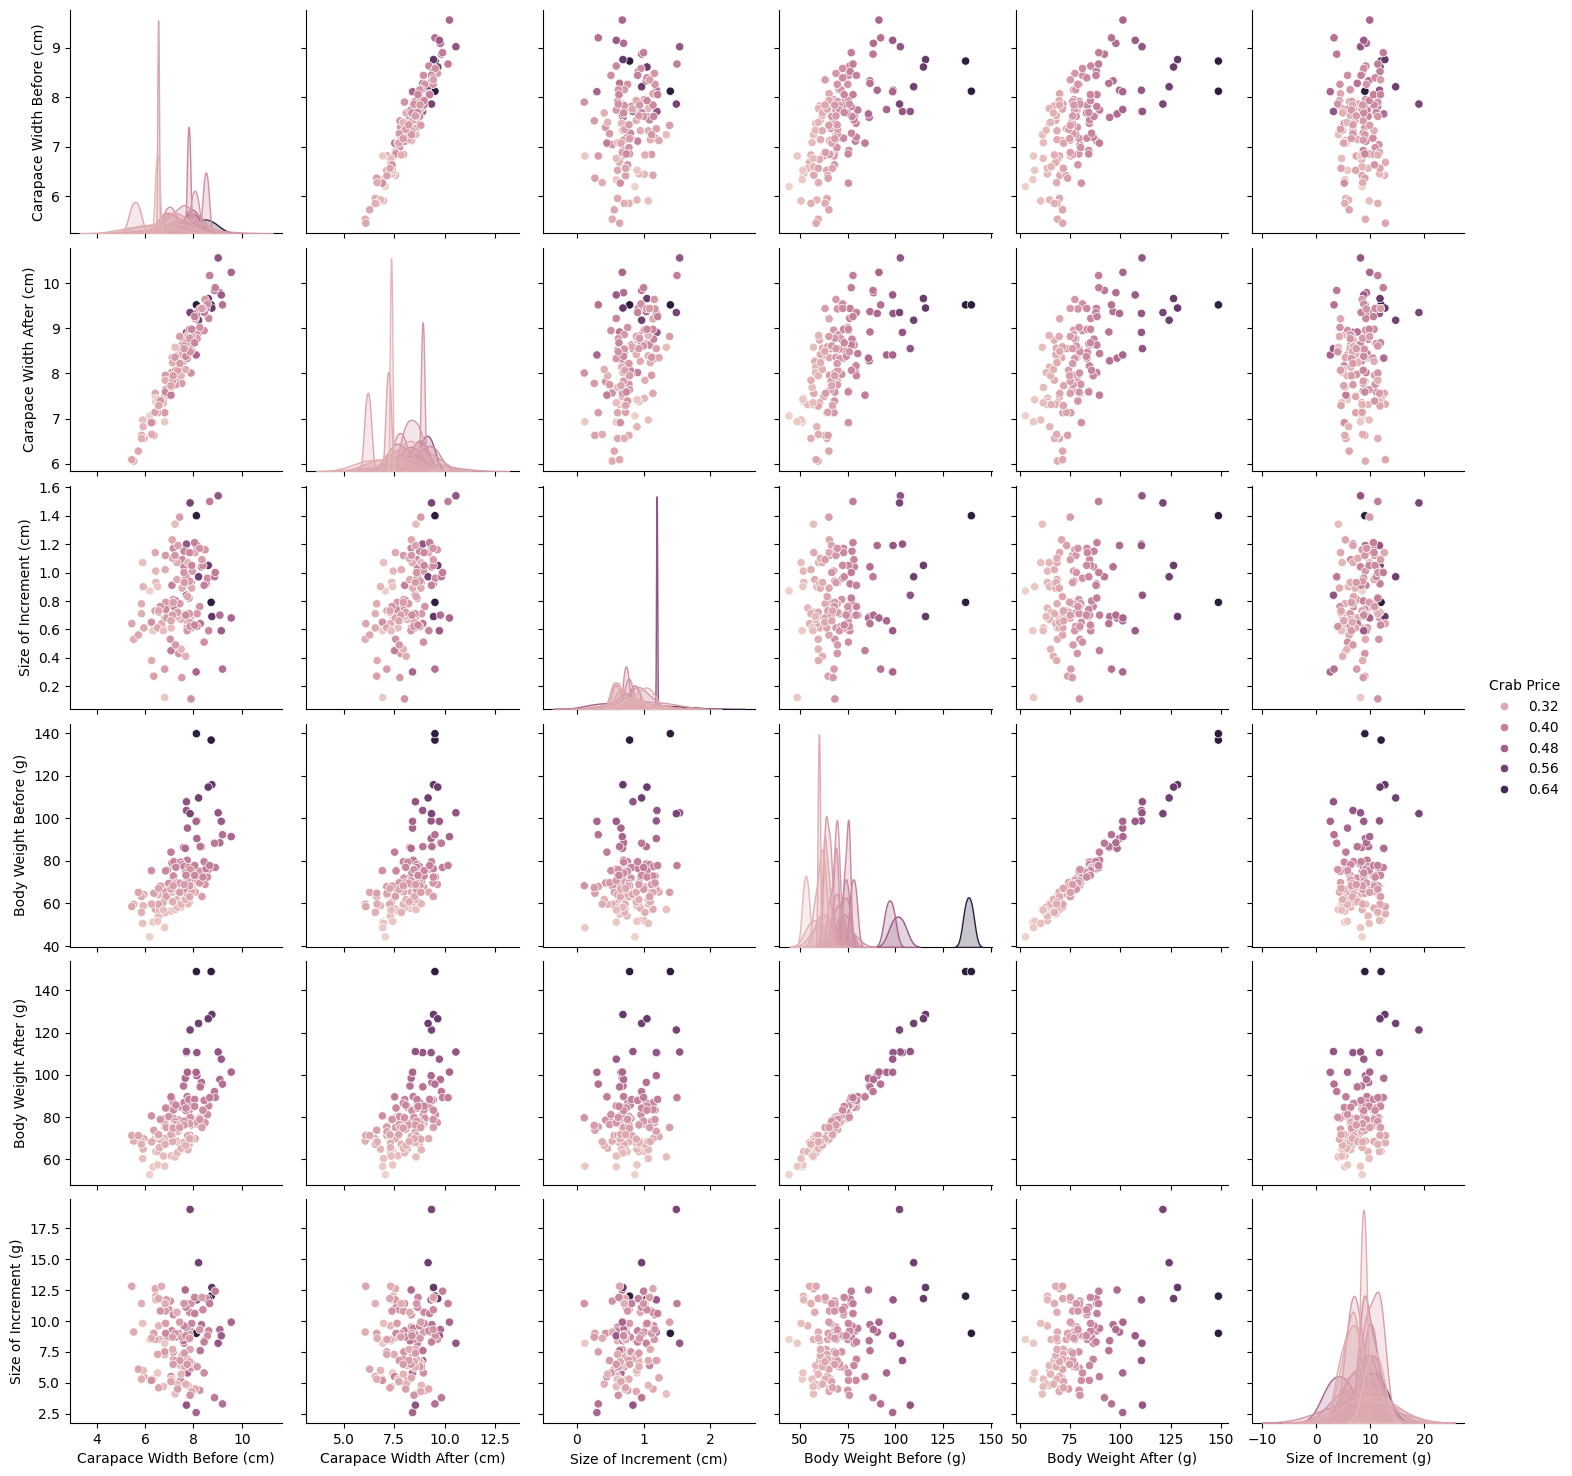

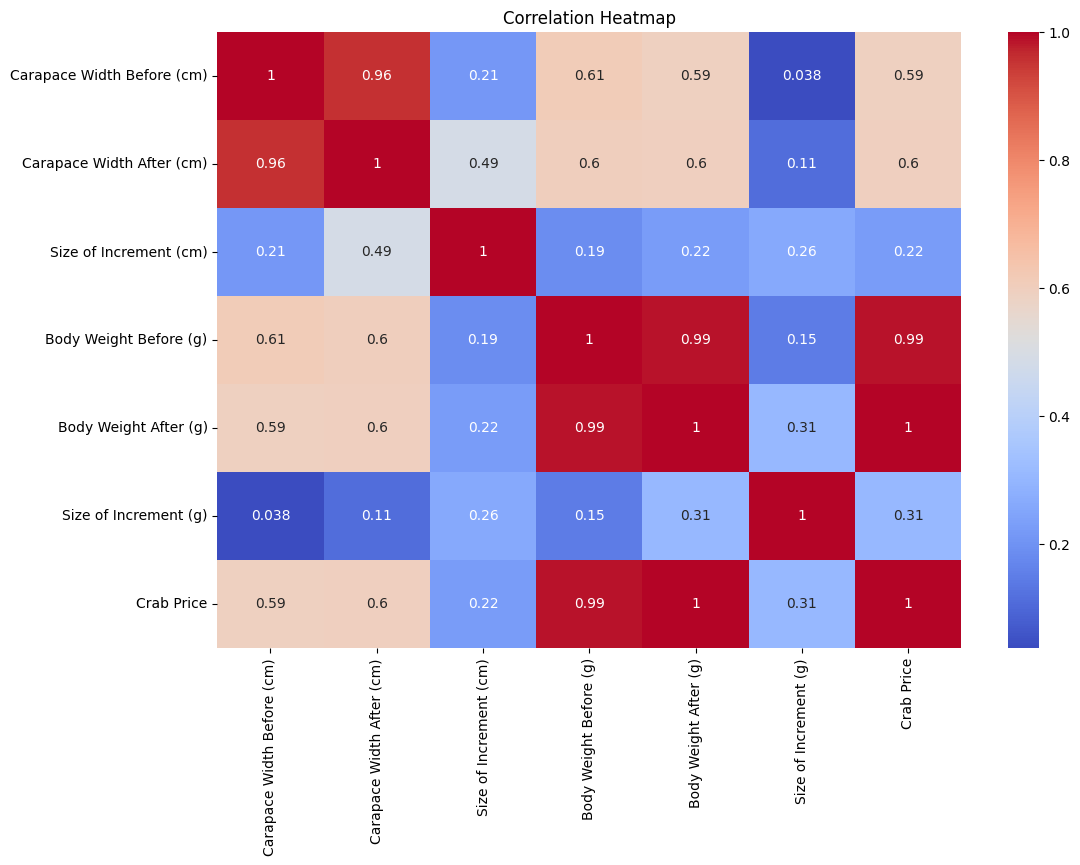

In [7]:
# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(data, hue='Crab Price')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Step 5: Train and test data split

In [8]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


#Step 6: Feature Importance Calculation

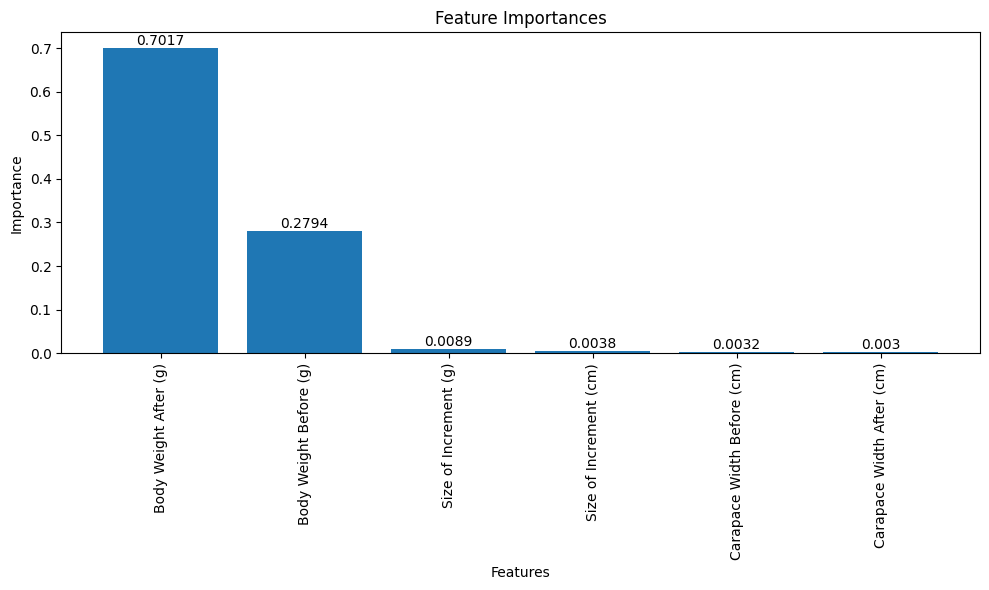

In [9]:

model = RandomForestRegressor()
model.fit(X_train, y_train)


# Importance for Select the desired features by column
# Select the desired features
selected_features = ['Carapace Width Before (cm)', 'Carapace Width After (cm)', 'Size of Increment (cm)', 'Size of Increment (g)', 'Body Weight Before (g)', 'Body Weight After (g)']

# Extract feature importances for selected features
importances = model.feature_importances_
feature_names = X.columns

selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)  # Assign 0 importance if feature not found

# Create a DataFrame with selected feature names and importance scores
selected_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Sort the DataFrame by importance scores in descending order
selected_feature_importances = selected_feature_importances.sort_values('Importance', ascending=False)


# Plot the feature importances with values displayed inside the bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()



#Step 7: Model training with cross validation

Cross-Validation RMSE Scores: [0.0075661  0.02088343 0.02270669 0.00763464 0.01905974]
Mean Cross-Validation RMSE: 0.015570121869707817


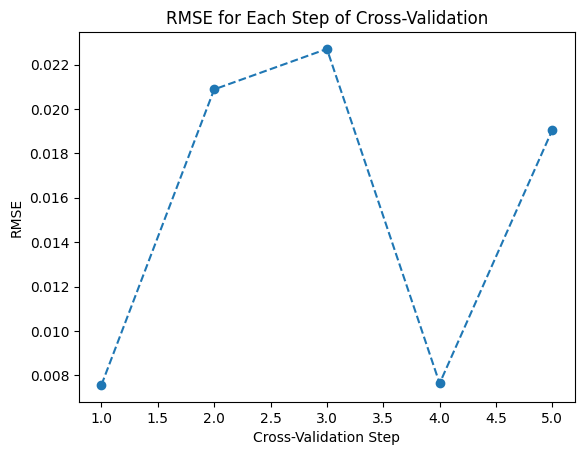

In [10]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

#Step 8: Model testing and evaluation

In [11]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 2.0240645777867954e-05
Mean Absolute Error: 0.00294036000000009


#Step 9: Model validation, prediction and evaluation

In [12]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 9.085586316763646e-06
Validation Mean Absolute Error: 0.0021992327272727045


#Step 9: Train Test Loss curves

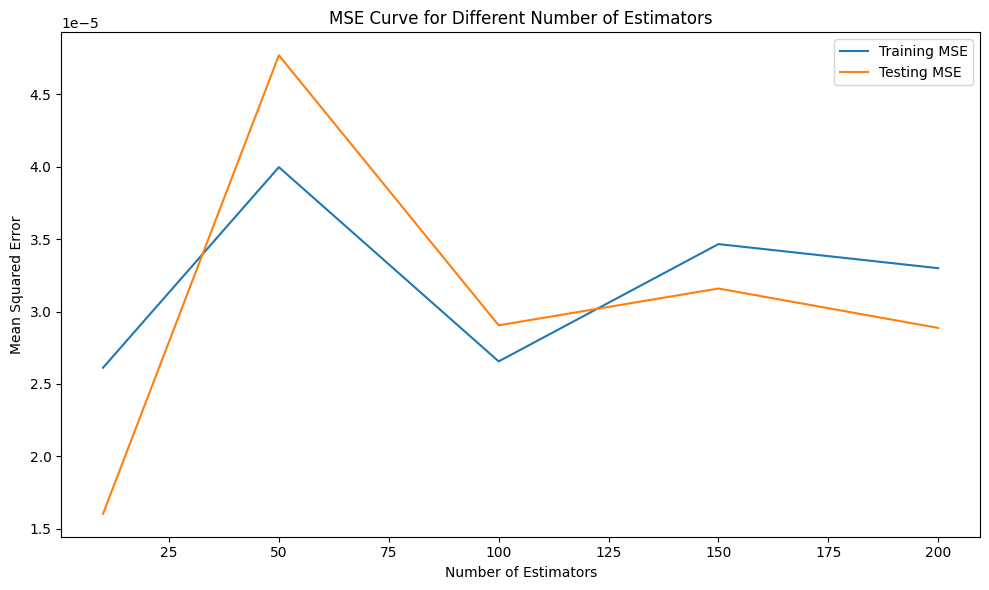

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

# Split your data into training and testing sets (assuming X and y are already defined)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


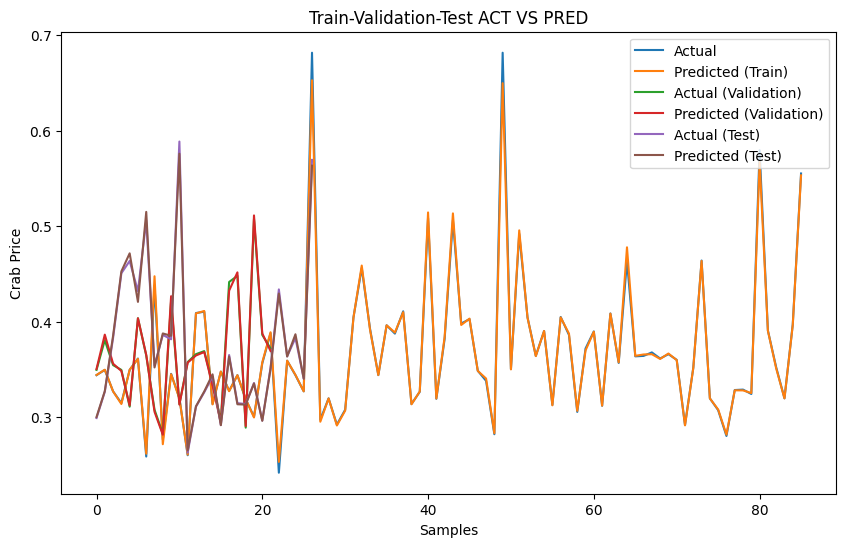

In [14]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Crab Price')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


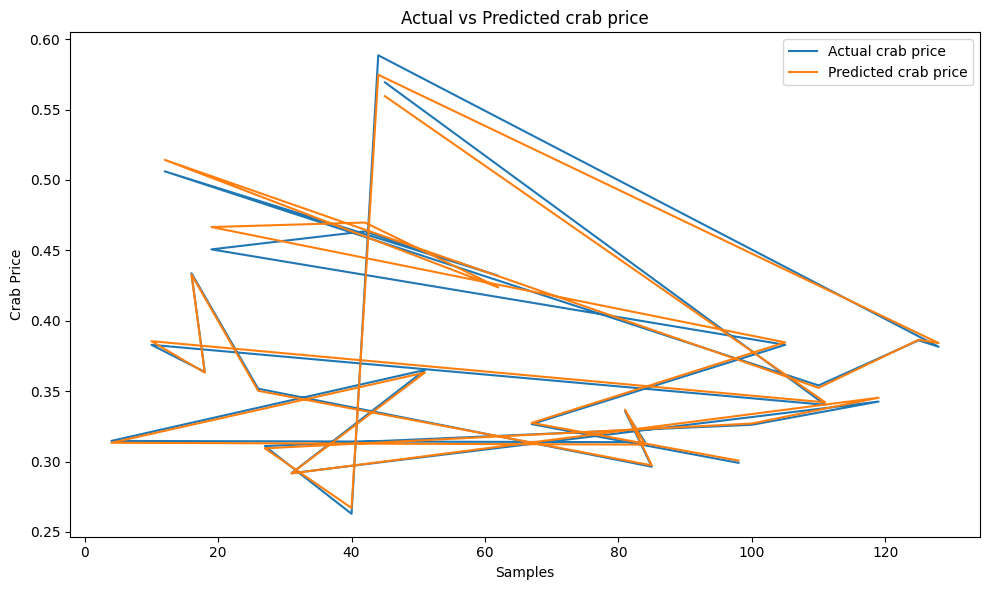

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.plot(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


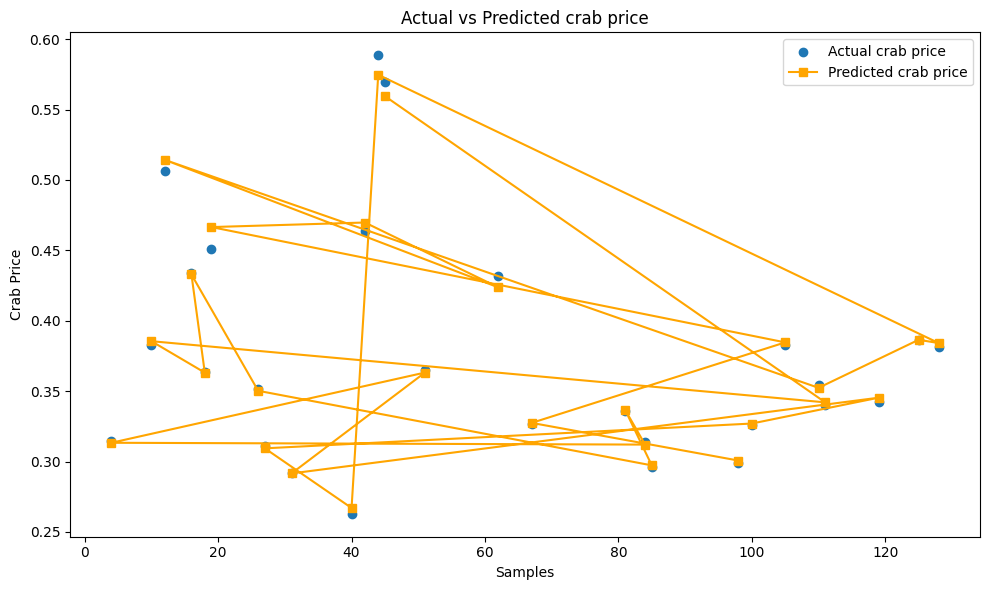

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.scatter(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.73%


In [18]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters
best_forest_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict using the best model
best_forest_pred = best_forest_model.predict(X_test)

# Calculate the metrics
best_mae = mean_absolute_error(y_test, best_forest_pred)
best_mse = mean_squared_error(y_test, best_forest_pred)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, best_forest_pred)
best_rmsle = np.sqrt(np.mean(np.log1p(best_forest_pred) - np.log1p(y_test)) ** 2)
best_mape = np.mean(np.abs((y_test - best_forest_pred) / y_test)) * 100

print("Best Random Forest Regressor Model after Hyperparameter Tuning:")
print(f"Best Parameters: {best_params}")
print(f"Mean Absolute Error (MAE): {best_mae:.2f}")
print(f"Mean Squared Error (MSE): {best_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_rmse:.2f}")
print(f"R-squared (R2): {best_r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {best_rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {best_mape:.2f}%")


Best Random Forest Regressor Model after Hyperparameter Tuning:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.74%


**LassoCV**

Cross-Validation RMSE Scores: [5.85487846e-05 9.81092244e-05 9.82298971e-05 7.95855978e-05
 2.90309717e-04]
Mean Cross-Validation RMSE: 0.00012495664426616054


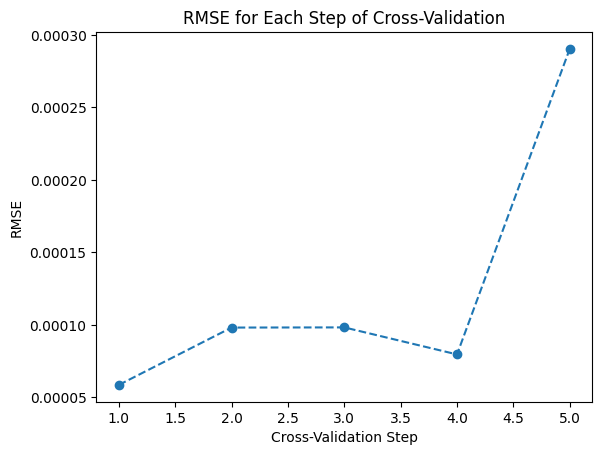

In [19]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = LassoCV(cv=5)  # LassoCV automatically performs cross-validation
lasso_regressor.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(lasso_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred_test = lasso_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.15290955110997e-08
Mean Absolute Error: 8.148149606376673e-05


In [21]:
# Predict on the validation set
y_pred_val = lasso_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 5.763383915227786e-09
Validation Mean Absolute Error: 6.509668362379832e-05


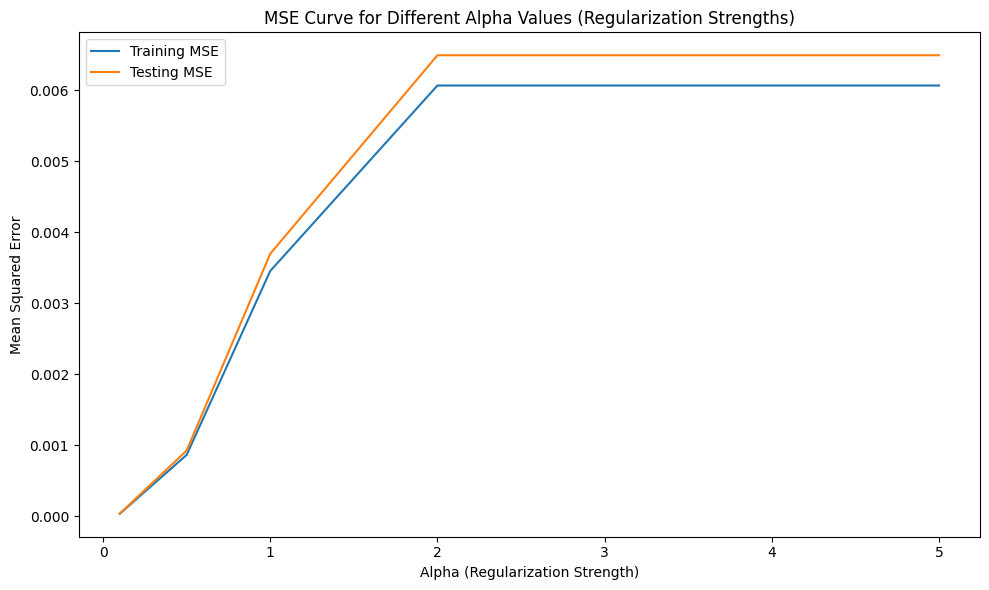

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of regularization strengths (alphas)
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

train_errors = []
test_errors = []

for alpha in alphas:
    # Train the Lasso regression model with cross-validation
    model = LassoCV(alphas=[alpha], cv=5)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training MSE')
plt.plot(alphas, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Alpha Values (Regularization Strengths)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


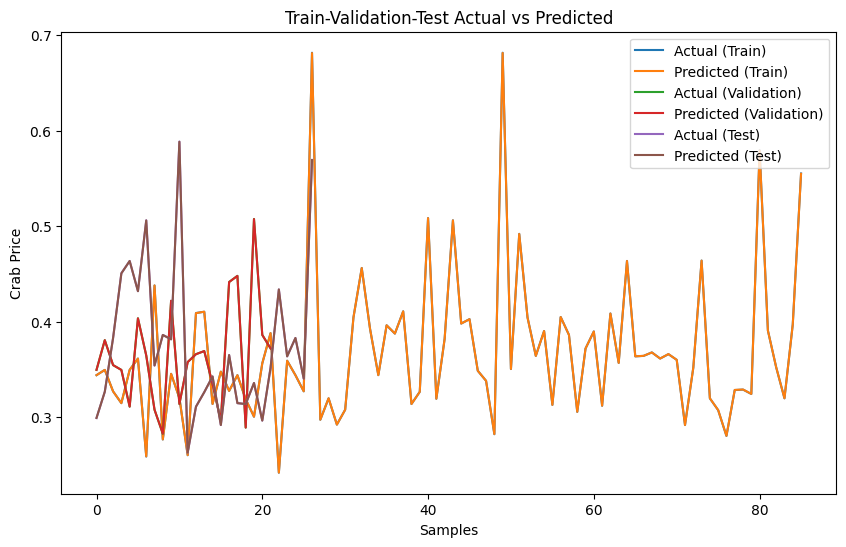

In [23]:
# Calculate the training set predictions
y_pred_train = lasso_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = lasso_regressor.predict(X_val)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Crab Price')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


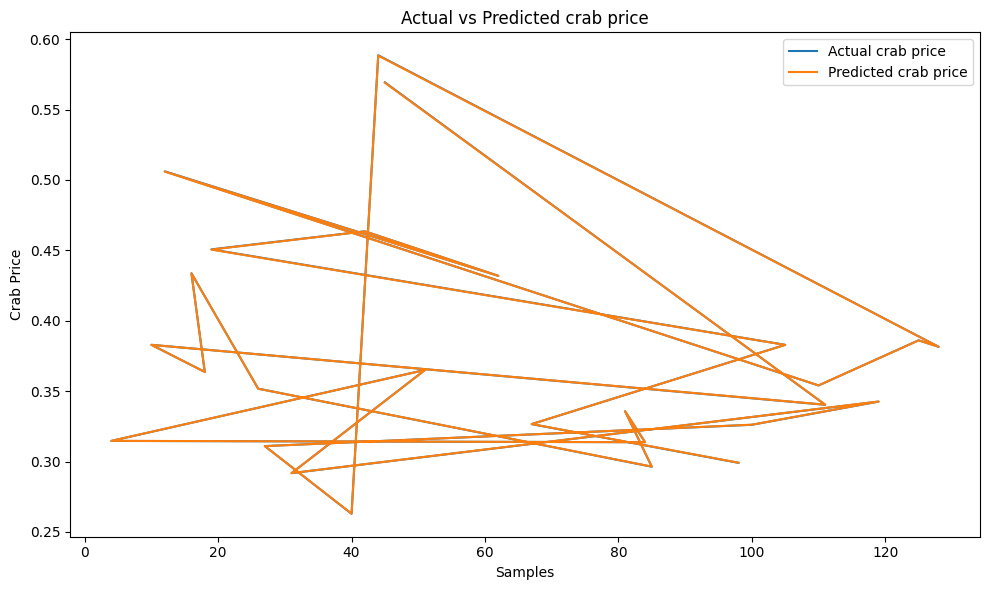

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lasso_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.plot(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


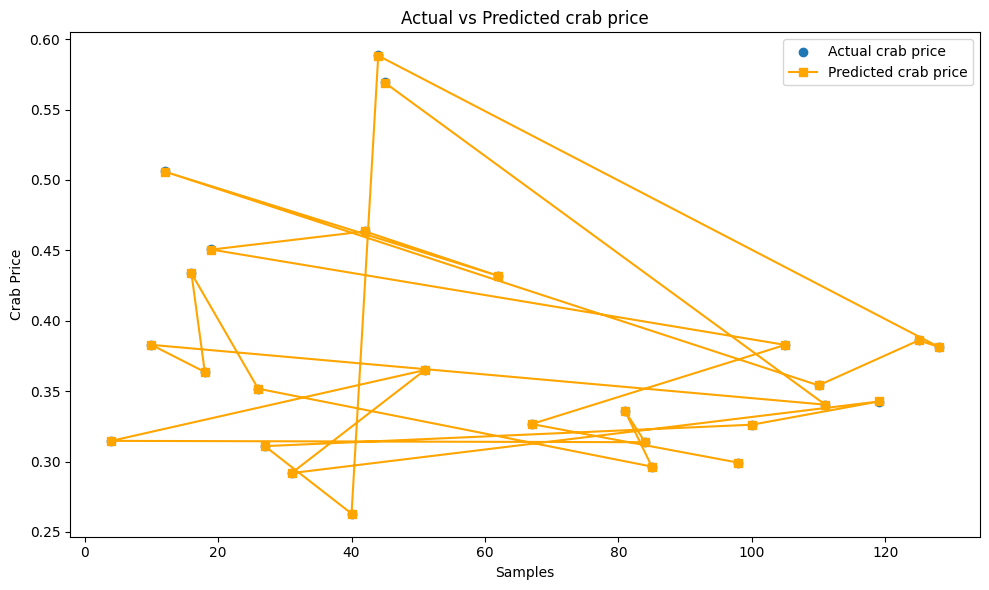

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lasso_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.scatter(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LassoCV model
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)
rmsle = np.sqrt(np.mean(np.log1p(lasso_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

print("\nLassoCV Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



LassoCV Model:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.02%


In [60]:
from sklearn.linear_model import LassoCV

# Create and fit LassoCV model
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions for all 136 actual values
lasso_predictions = lasso_model.predict(X_test)

# Printing the actual and predicted values for the first 10 samples as an example
print("Actual Values:", y_test[:10])
print("Predicted Values:", lasso_predictions[:10])


Actual Values: 98     0.299074
67     0.326554
105    0.382888
19     0.450672
42     0.463496
62     0.431894
12     0.506090
110    0.354034
125    0.386094
128    0.381514
Name: Crab Price, dtype: float64
Predicted Values: [0.29918369 0.32663282 0.38283005 0.45052209 0.46346554 0.43185511
 0.50590906 0.35408194 0.38602558 0.38145332]


In [61]:
from sklearn.linear_model import LassoCV

# Create and fit LassoCV model
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions for all 136 actual values
lasso_predictions = lasso_model.predict(X_test)

# Printing all actual and predicted values
print("Actual Values:", y_test)
print("Predicted Values:", lasso_predictions)


Actual Values: 98     0.299074
67     0.326554
105    0.382888
19     0.450672
42     0.463496
62     0.431894
12     0.506090
110    0.354034
125    0.386094
128    0.381514
44     0.588530
40     0.262892
27     0.310982
100    0.326096
119    0.342584
31     0.291746
51     0.365026
4      0.314646
84     0.313730
81     0.335714
85     0.296326
26     0.351744
16     0.433726
18     0.363652
10     0.382888
111    0.340294
45     0.569294
Name: Crab Price, dtype: float64
Predicted Values: [0.29918369 0.32663282 0.38283005 0.45052209 0.46346554 0.43185511
 0.50590906 0.35408194 0.38602558 0.38145332 0.58826032 0.26303016
 0.31094368 0.32615965 0.34264157 0.29178605 0.36496946 0.31469012
 0.31373019 0.33577151 0.29642439 0.35174333 0.43367002 0.36360245
 0.38287281 0.34039237 0.56900162]


In [62]:
from sklearn.linear_model import LassoCV

# Create and fit LassoCV model
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions for all 136 actual values
lasso_predictions = lasso_model.predict(X_test)

# Printing all actual and predicted values serially
print("Actual Values and Predicted Values:")
for actual, predicted in zip(y_test, lasso_predictions):
    print("Actual:", actual, "Predicted:", predicted)


Actual Values and Predicted Values:
Actual: 0.299074 Predicted: 0.29918369028218866
Actual: 0.326554 Predicted: 0.326632816258111
Actual: 0.382888 Predicted: 0.3828300540692396
Actual: 0.450672 Predicted: 0.4505220896888243
Actual: 0.463496 Predicted: 0.463465535362978
Actual: 0.431894 Predicted: 0.4318551137199536
Actual: 0.50609 Predicted: 0.505909055249831
Actual: 0.354034 Predicted: 0.35408194223403333
Actual: 0.386094 Predicted: 0.38602558449254315
Actual: 0.381514 Predicted: 0.3814533217131174
Actual: 0.58853 Predicted: 0.58826032050244
Actual: 0.262892 Predicted: 0.2630301607960529
Actual: 0.310982 Predicted: 0.31094368052139665
Actual: 0.326096 Predicted: 0.3261596519483166
Actual: 0.342584 Predicted: 0.3426415669733641
Actual: 0.291746 Predicted: 0.29178604728094304
Actual: 0.365026 Predicted: 0.3649694630256489
Actual: 0.314646 Predicted: 0.31469012175133304
Actual: 0.31373 Predicted: 0.3137301874947974
Actual: 0.335714 Predicted: 0.3357715108296997
Actual: 0.296326 Predicted

**ExtraTree Regressor**

Cross-Validation RMSE Scores: [0.00392248 0.00785463 0.01183617 0.00213916 0.00372101]
Mean Cross-Validation RMSE: 0.005894690058705481


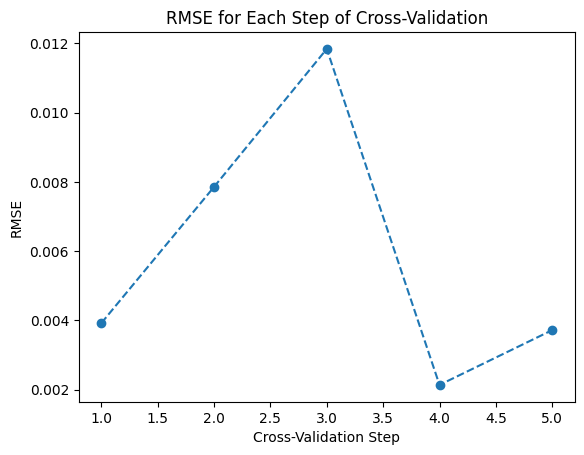

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

et_regressor = ExtraTreesRegressor()
et_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(et_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

et_regressor = ExtraTreesRegressor()
et_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = et_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.1416091830904845e-05
Mean Absolute Error: 0.0018649081481482124


In [29]:
# Predict on the validation set
y_pred_val = et_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 5.722468708945433e-06
Validation Mean Absolute Error: 0.0015159800000000027


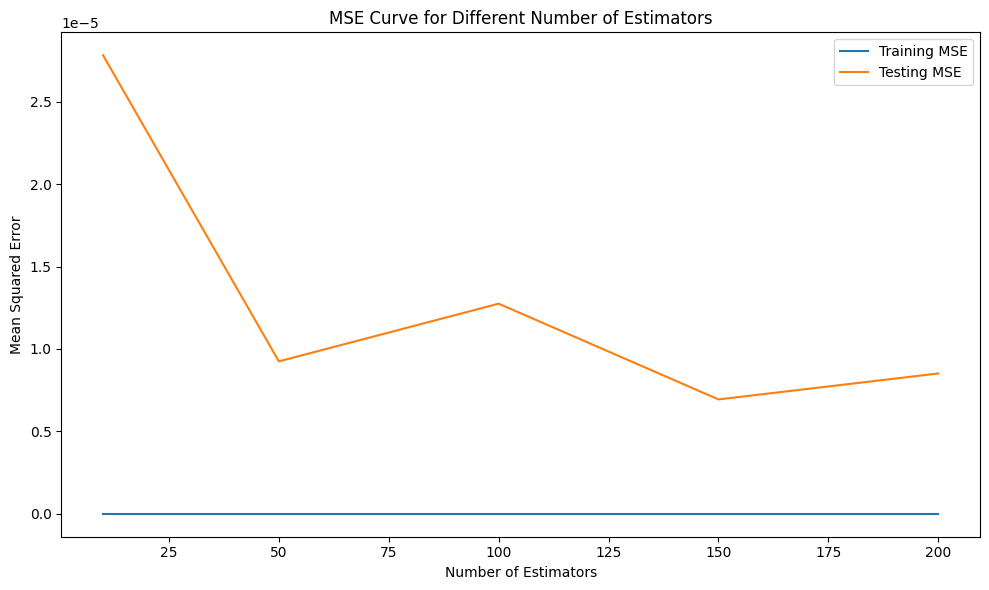

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

num_estimators = [10, 50, 100, 150, 200]
train_errors = []
test_errors = []

for n in num_estimators:
    # Train the Extra Trees regression model
    model = ExtraTreesRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


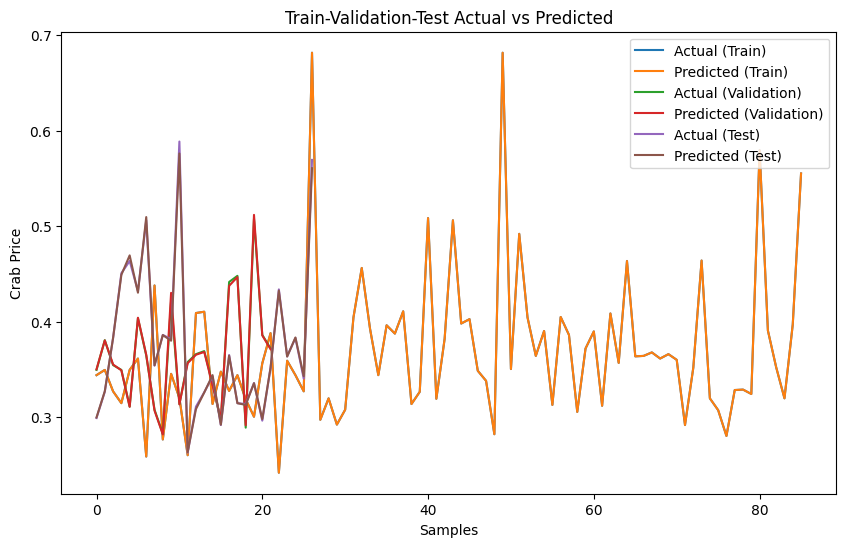

In [31]:
# Calculate the training set predictions
y_pred_train = et_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = et_regressor.predict(X_val)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Crab Price')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


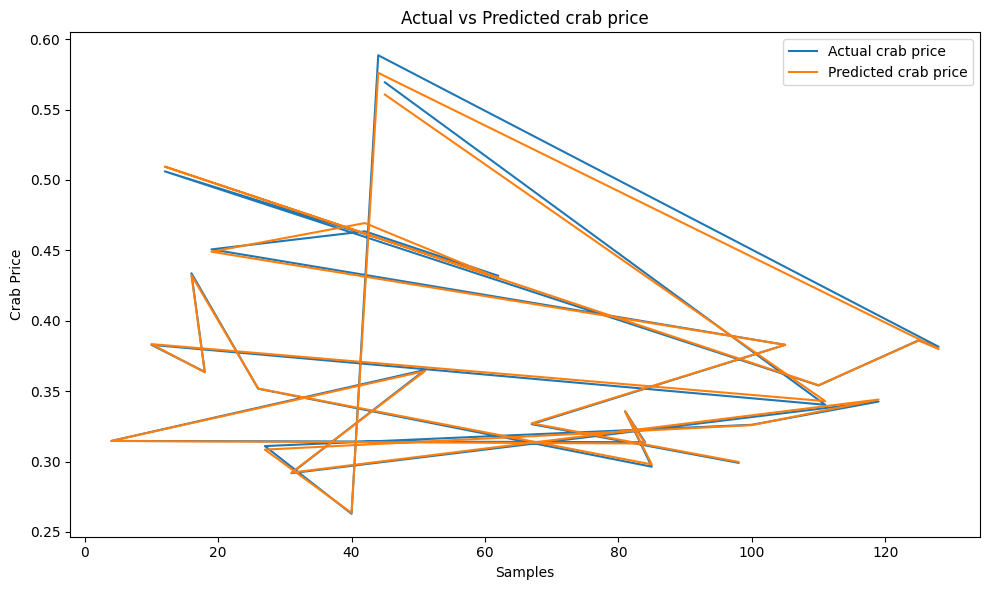

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = et_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.plot(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


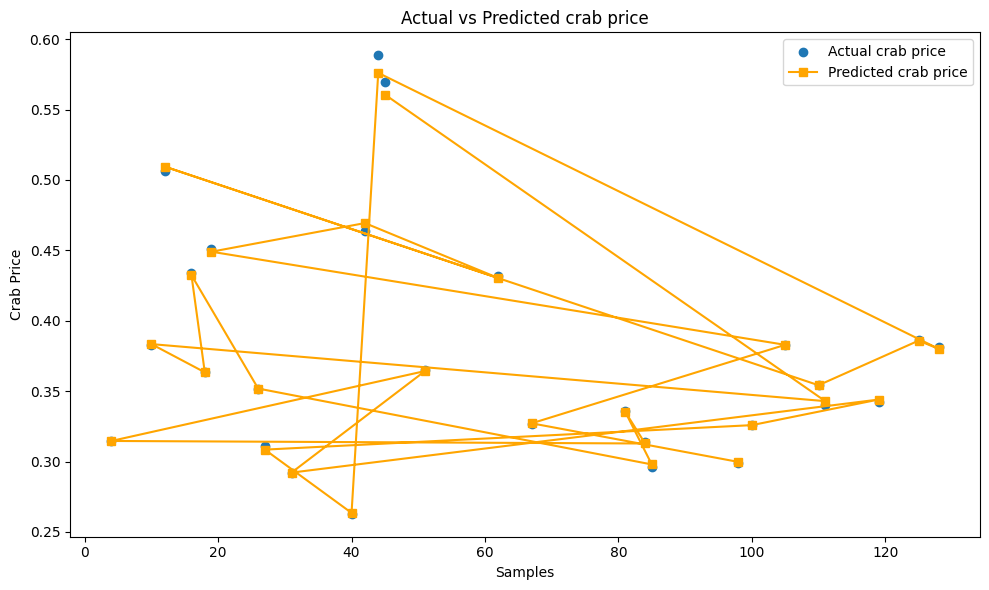

In [33]:
# Make predictions on the test set
y_pred = et_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.scatter(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate ExtraTree Regressor with a specific number of estimators
extra_tree_model = ExtraTreesRegressor(n_estimators=num_estimators, random_state=42)
extra_tree_model.fit(X_train, y_train)
extra_tree_pred = extra_tree_model.predict(X_test)

mae = mean_absolute_error(y_test, extra_tree_pred)
mse = mean_squared_error(y_test, extra_tree_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, extra_tree_pred)
rmsle = np.sqrt(np.mean(np.log1p(extra_tree_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - extra_tree_pred) / y_test)) * 100

print(f"\nExtraTree Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



ExtraTree Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.55%


**KNN Regressior**

Cross-Validation RMSE Scores: [0.00988837 0.02931193 0.03373079 0.00555855 0.02126006]
Mean Cross-Validation RMSE: 0.019949939540633697


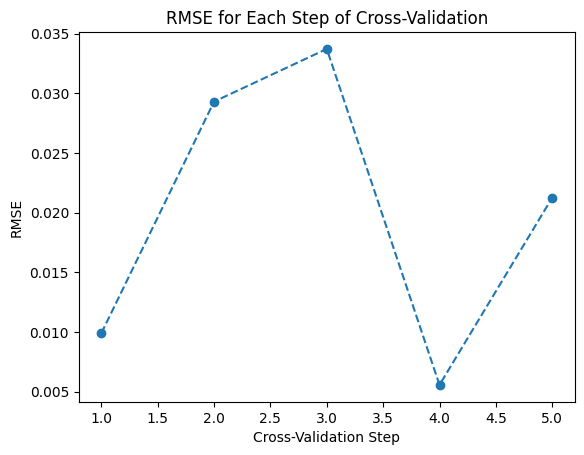

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()



In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.00023223951338666594
Mean Absolute Error: 0.007660474074074059


In [37]:
# Predict on the validation set
y_pred_val = knn_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 3.909733987636357e-05
Validation Mean Absolute Error: 0.0041511454545454666


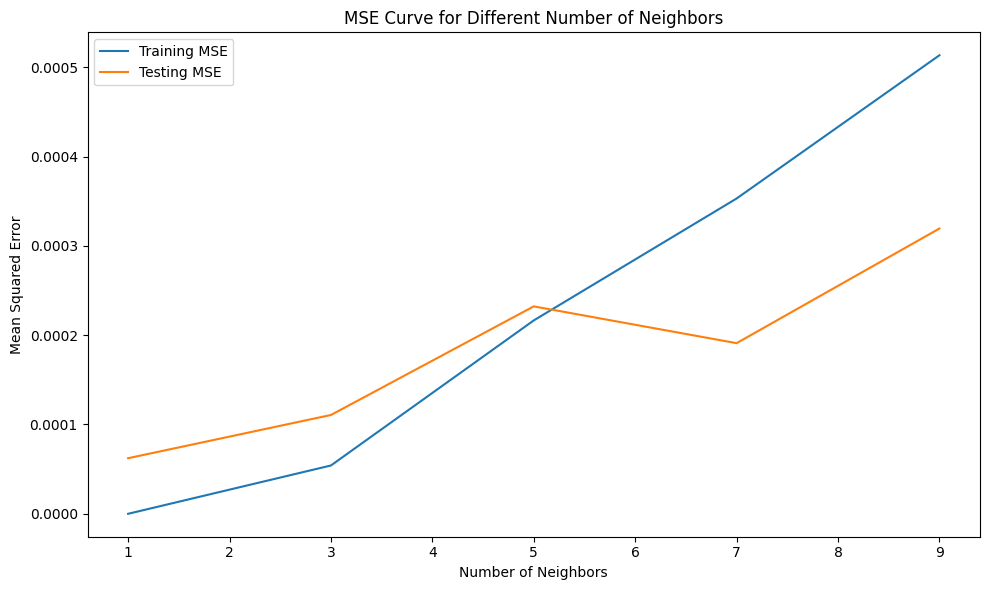

In [38]:
from sklearn.neighbors import KNeighborsRegressor

num_neighbors = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for k in num_neighbors:
    # Train the KNN regression model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors, train_errors, label='Training MSE')
plt.plot(num_neighbors, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


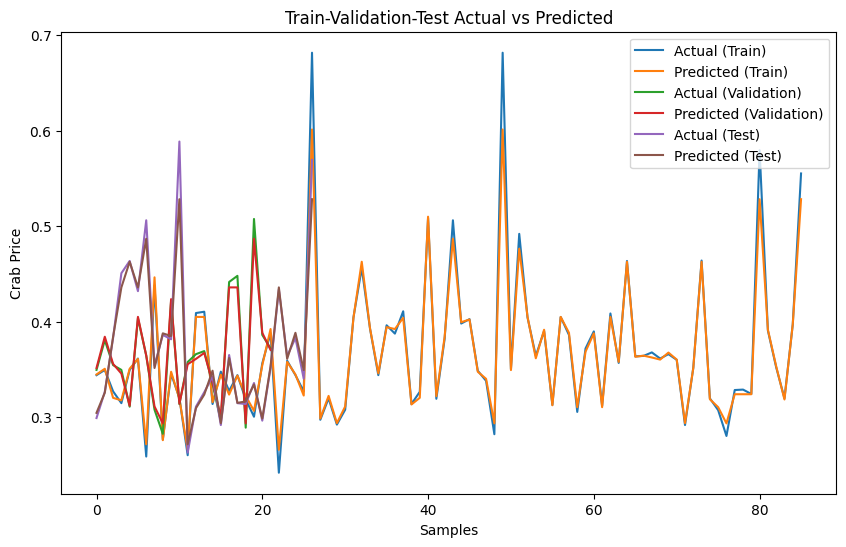

In [39]:
# Calculate the training set predictions
y_pred_train = knn_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = knn_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = knn_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Crab Price')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


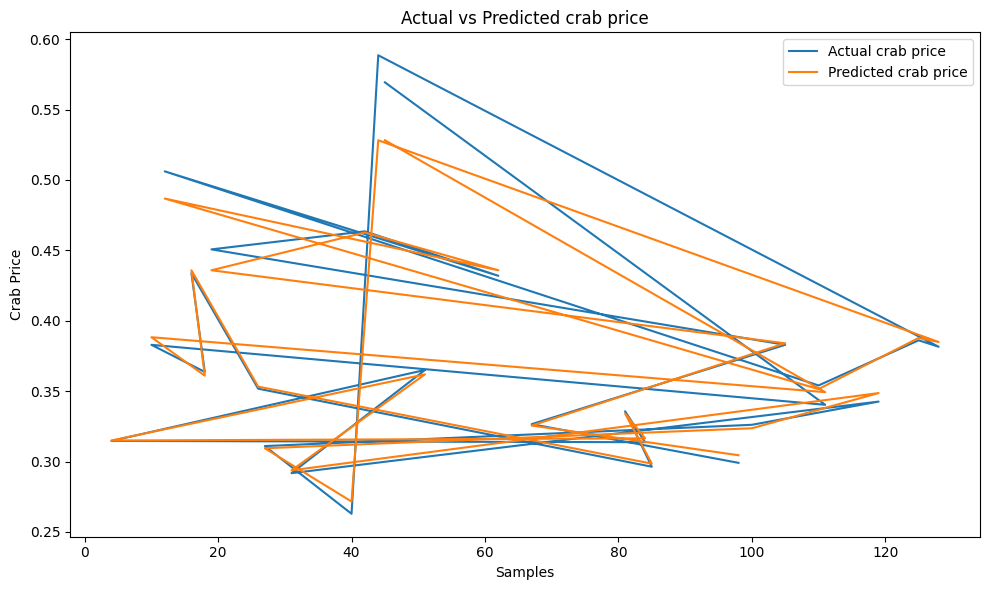

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.plot(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


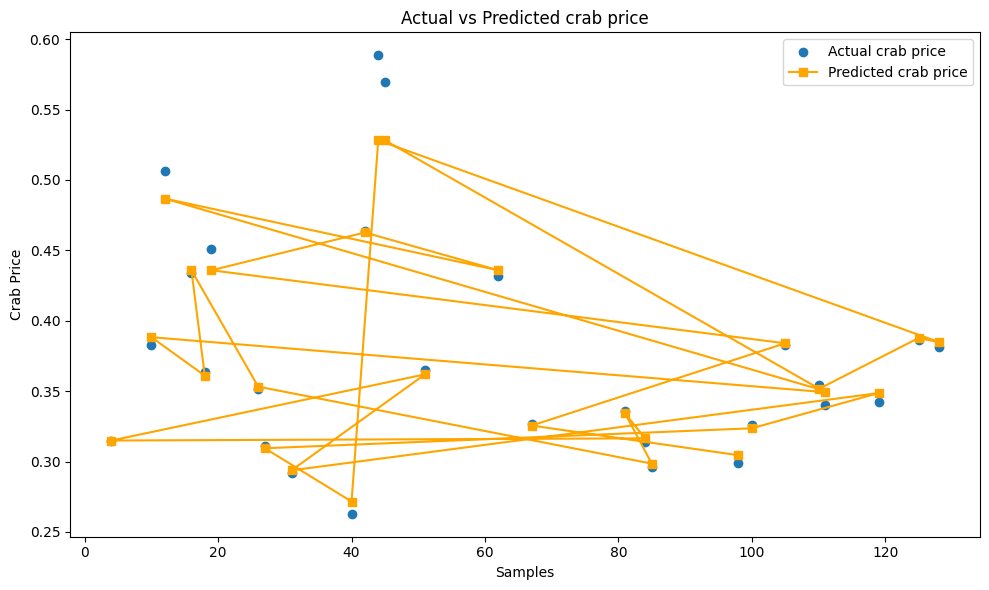

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.scatter(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R-squared (R2): 0.96
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 1.70%


In [43]:
from sklearn.neighbors import KNeighborsRegressor

# Set hyperparameter values
n_neighbors = 7  # Number of neighbors to consider (you can adjust this)
weights = 'distance'  # Weight points by the inverse of their distance
algorithm = 'auto'  # Algorithm to compute the nearest neighbors
leaf_size = 30  # Leaf size for the BallTree or KDTree
p = 2  # Power parameter for the Minkowski metric (2 for Euclidean distance)

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(
    n_neighbors=n_neighbors,
    weights=weights,
    algorithm=algorithm,
    leaf_size=leaf_size,
    p=p
)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.01
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 1.25%


**LGBM Regressor**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 6
[LightGBM] [Info] Start training from score 0.368775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

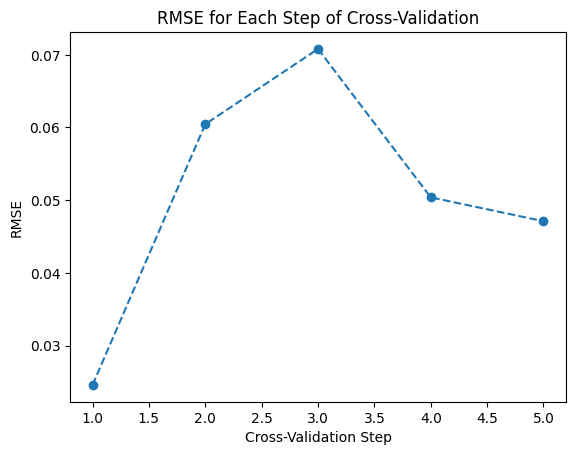

In [44]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

cv_scores = cross_val_score(lgbm_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [45]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have X_train, X_test, y_train, and y_test defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

# Predict on the test set
y_pred_test = lgbm_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 6
[LightGBM] [Info] Start training from score 0.368775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [46]:
# Predict on the validation set
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.0005585519858971274
Validation Mean Absolute Error: 0.017730513593512617


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 6
[LightGBM] [Info] Start training from score 0.368775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 6
[LightGBM] [Info] Start training from score 0.368775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

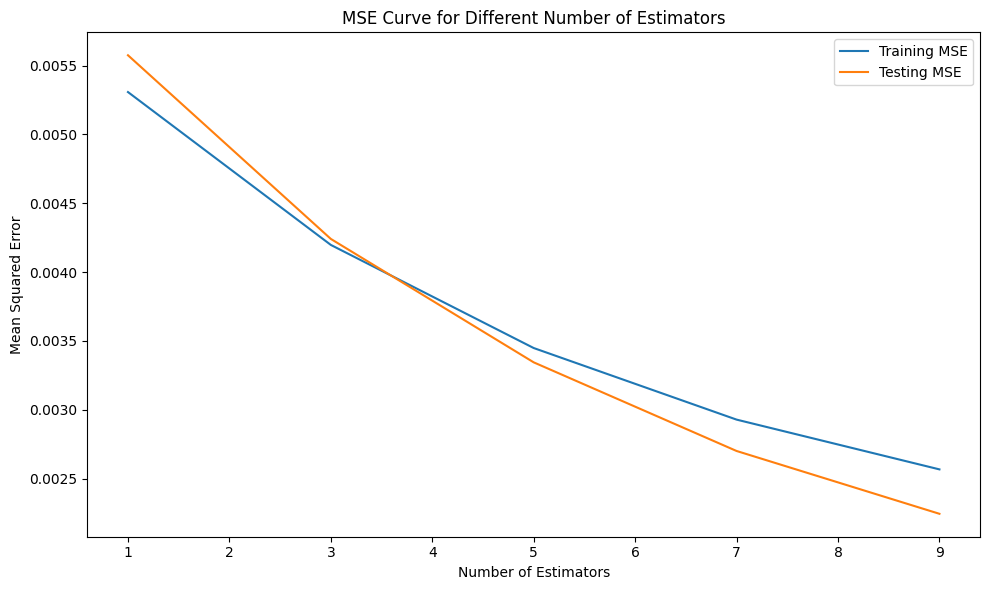

In [47]:
from lightgbm import LGBMRegressor

num_estimators = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for n in num_estimators:
    # Train the LGBM regression model
    model = LGBMRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


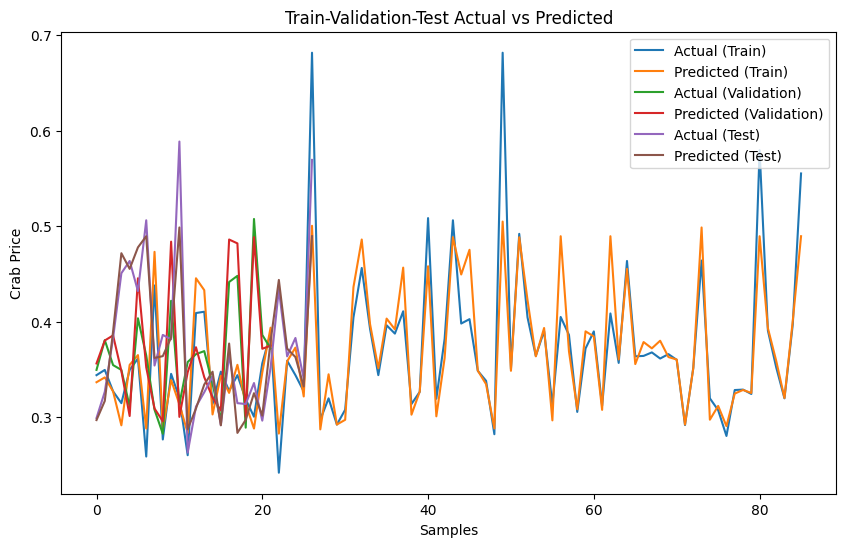

In [48]:
# Calculate the training set predictions
y_pred_train = lgbm_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = lgbm_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Crab Price')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


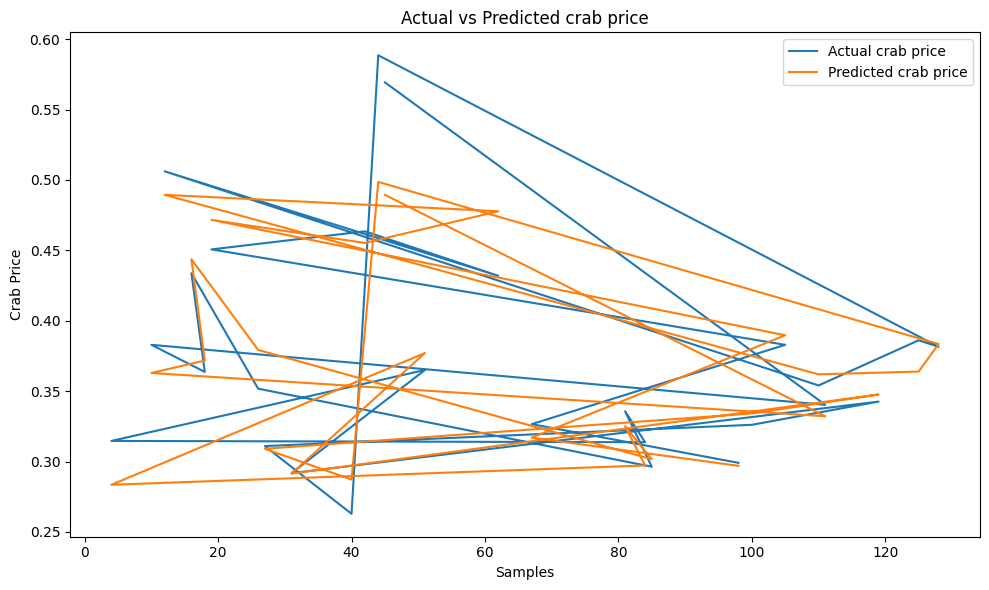

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.plot(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


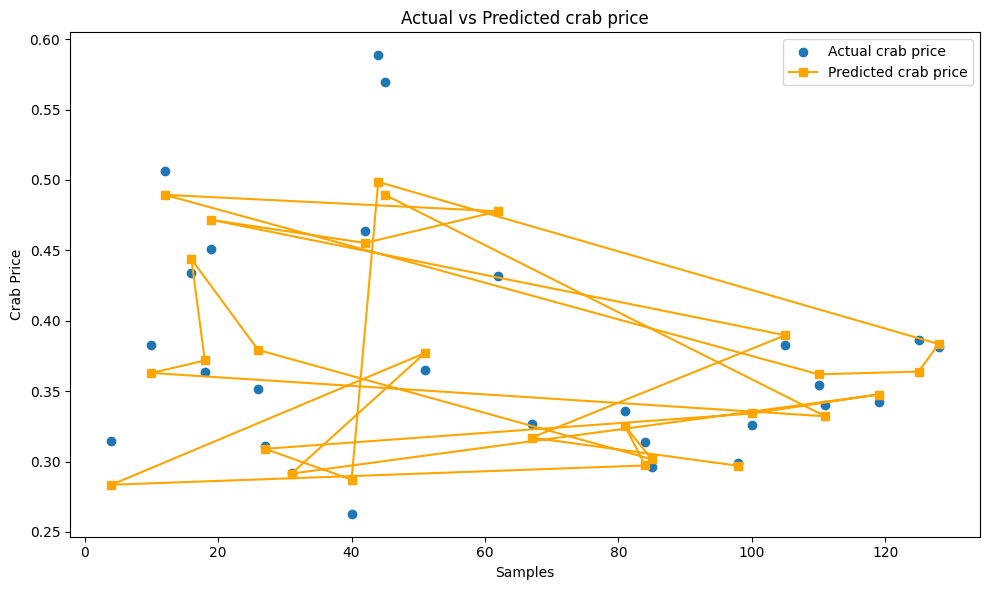

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.scatter(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LGBMRegressor model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print("\nLGBMRegressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 6
[LightGBM] [Info] Start training from score 0.368775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**SVR**

Cross-Validation RMSE Scores: [0.04635453 0.05775521 0.03958825 0.02996579 0.04217178]
Mean Cross-Validation RMSE: 0.04316711030428009


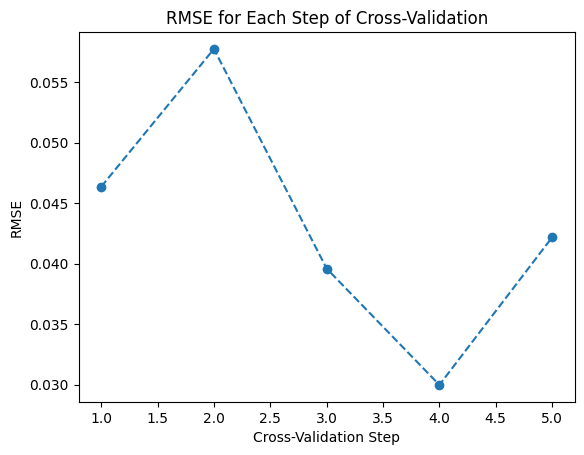

In [52]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [53]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = svr_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.0015401122944384124
Mean Absolute Error: 0.03399129456678962


In [54]:
# Assuming X_val and y_val are defined

# Predict on the validation set
y_pred_val = svr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 0.0014203689288258192
Validation Mean Absolute Error: 0.032372368289147725


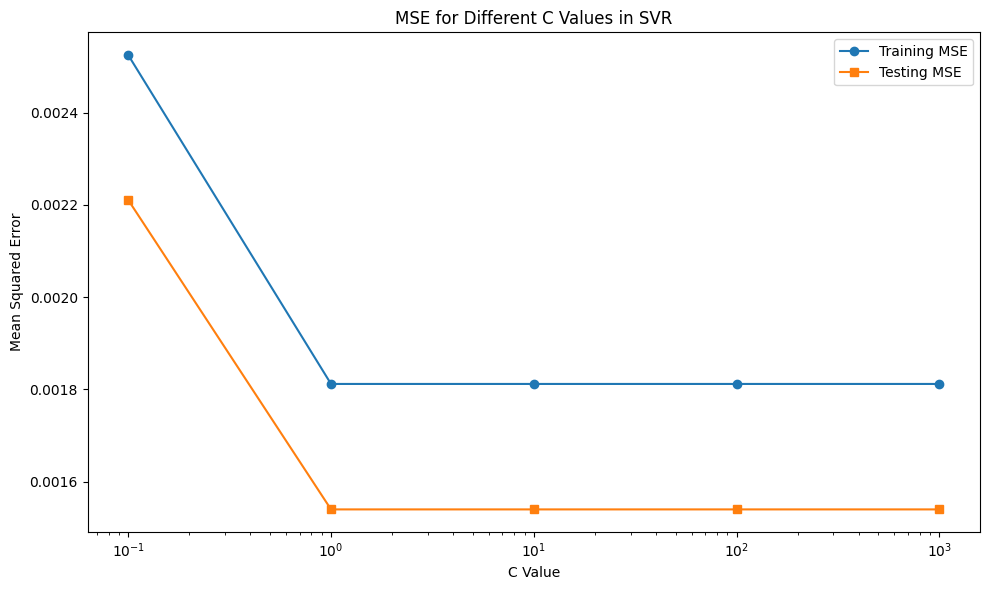

In [55]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Instead of num_estimators, we'll use a range of C values for SVR
C_values = [0.1, 1, 10, 100, 1000]
train_errors = []
test_errors = []

for C in C_values:
    # Initialize and train the SVR model with the current C value
    model = SVR(C=C)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and append the mean squared errors for both sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training MSE', marker='o')
plt.plot(C_values, test_errors, label='Testing MSE', marker='s')
plt.title('MSE for Different C Values in SVR')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # C values span several orders of magnitude
plt.legend()
plt.tight_layout()
plt.show()


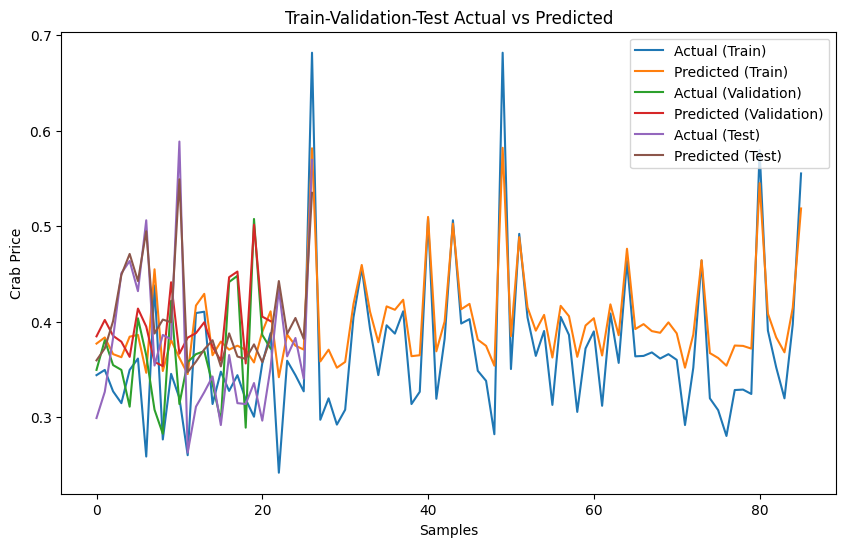

In [56]:
# Calculate the training set predictions
y_pred_train = svr_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = svr_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = svr_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Crab Price')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


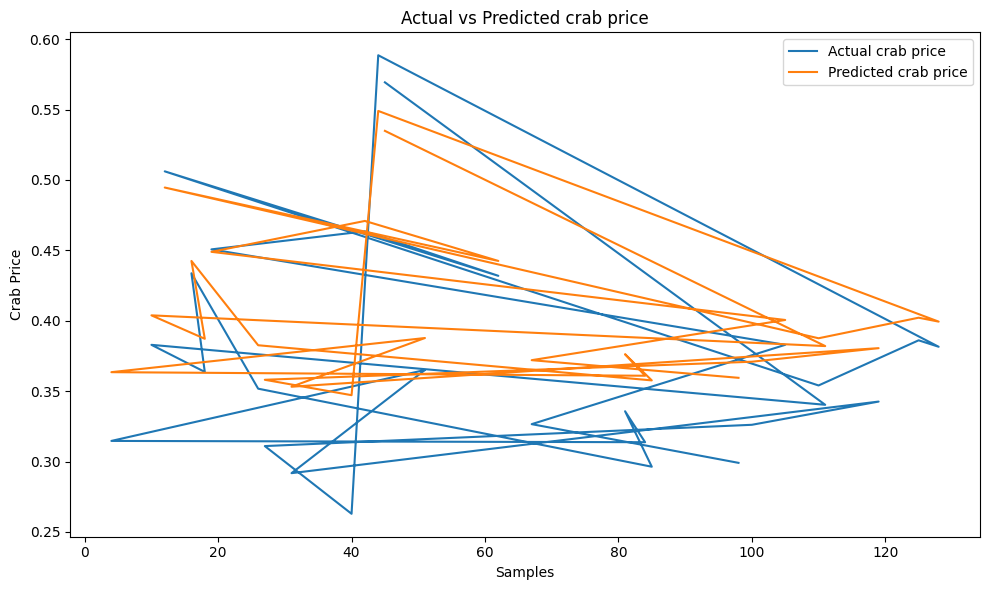

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted crab price")
plt.plot(rent_comparison.index, rent_comparison['Actual crab price'], label='Actual crab price')
plt.plot(rent_comparison.index, rent_comparison['Predicted crab price'], label='Predicted crab price')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


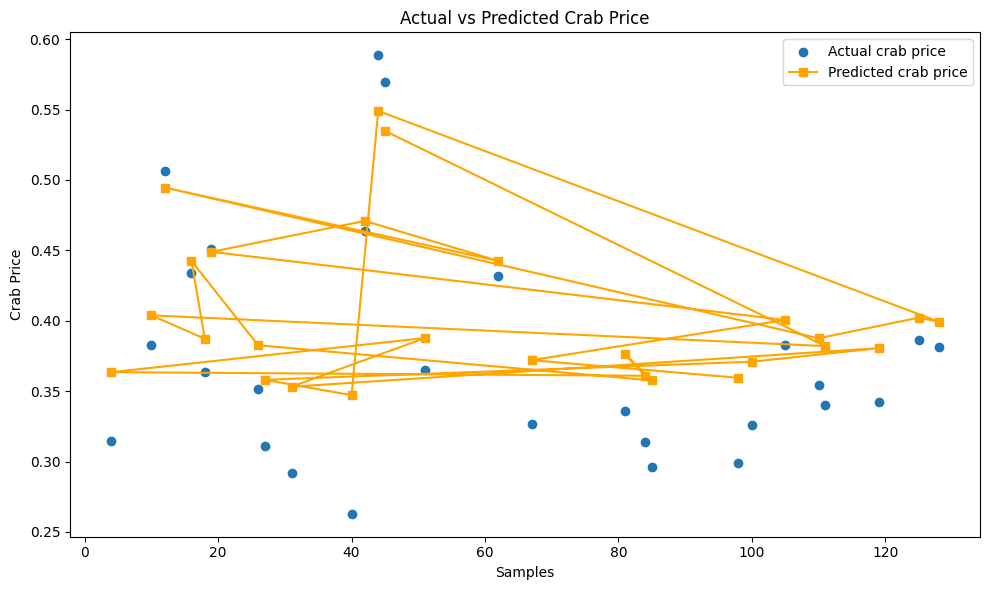

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Assuming SVR model has been trained and X_test is defined
# Initialize SVR model - Example uses default parameters; adjust as needed
svr_model = SVR()

# Fit the SVR model on the training data (assuming X_train and y_train are defined)
svr_model.fit(X_train, y_train)

# Make predictions on the test set using the trained SVR model
y_pred = svr_model.predict(X_test)

# Create a DataFrame with actual and predicted crab prices
crab_price_comparison = pd.DataFrame({'Actual crab price': y_test, 'Predicted crab price': y_pred})

# Plot the actual versus predicted crab prices
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Crab Price")
plt.scatter(crab_price_comparison.index, crab_price_comparison['Actual crab price'], label='Actual crab price', marker='o')
plt.plot(crab_price_comparison.index, crab_price_comparison['Predicted crab price'], label='Predicted crab price', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Crab Price")
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R-squared (R2): 0.76
Root Mean Squared Logarithmic Error (RMSLE): 0.02
Mean Absolute Percentage Error (MAPE): 10.15%
